In [1]:
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform
import numpy as np

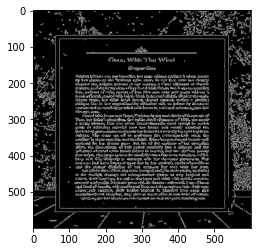

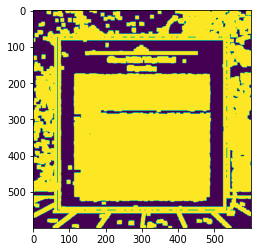

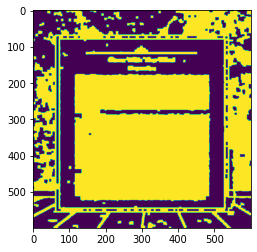

4


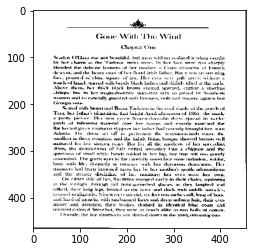

In [2]:
# read, resize, and make a copy of the image
img = cv2.imread('test1.jpg')
img = cv2.resize(img, (600, 600))
orig_img = img.copy()

# preprocess the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(img, 100, 200)
plt.imshow(edged,cmap='gray')
plt.show()

dilated = cv2.dilate(edged,np.ones((5,5)), iterations=2)
plt.imshow(dilated)
plt.show()
eroded = cv2.erode(dilated,np.ones((5,5)), iterations=1)
plt.imshow(eroded)
plt.show()


# find and sort the contours
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
# go through each contour
chosen_contour = None
for contour in contours:
    # approximate each contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    # check if we have found our document
    if len(approx) == 4:
        doc_cnts = approx
        break

temp = orig_img.copy()
temp1 = orig_img.copy()
point_count = 0
points = []

window_name = 'Document Region'
def Mouse_Event(event, x, y, flags, param):
    global point_count
    if event == cv2.EVENT_LBUTTONDOWN:
        point_count += 1
        # read colours at left clicked point
        points.append([x,y])
        cv2.circle(temp,(x,y),2,(0,0,255),2)
        cv2.imshow(window_name,temp)

        
cv2.drawContours(temp,[doc_cnts],-1,(0,255,0),3)
cv2.imshow(window_name, temp)
cv2.setMouseCallback(window_name, Mouse_Event)
cv2.waitKey(0)
cv2.destroyWindow(window_name)

print(point_count)
if point_count == 4:
#     cv2.imshow('Modified Document Region',)
    points = np.reshape(np.array(points),(4,1,2))
    doc_cnts = points

# apply warp perspective to get the top-down view
warped = four_point_transform(orig_img, doc_cnts.reshape(4, 2))
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# final_img = cv2.resize(warped, (600, 800))

# write the image in the ouput directory
# # cv2.imwrite("output" + "/" + os.path.basename(img_file), final_img)
# plt.imshow(warped,cmap='gray')
# plt.show()

# blur = cv2.GaussianBlur(warped,(5,5),0)
ret3,th3 = cv2.threshold(warped,0,255,cv2.THRESH_OTSU)
plt.imshow(th3,cmap='gray')
plt.show()